In [1]:
# The probable pitcher for the last game of the series for SDP is listed as Yu Darvish.
# The probable pitcher for the last game of the series for LAD is listed as Yoshinobu Yamamoto.

In [33]:
# load up the image in the directory

from IPython.display import Image
from IPython.core.display import HTML

Image(
    url="./we-found-yamamotos-biggest-fan-and-hes-also-a-pretty-good-v0-x7fcgcrgr10d1.webp"
)

# Get IDs

In [2]:
YY = 808967
YD = 506433

In [3]:
import pybaseball
from pybaseball import statcast_pitcher


# get pitcher data
def pitcher_data(pitcher_id, start_date, end_date):
    data = statcast_pitcher(start_date, end_date, pitcher_id)
    return data

In [4]:
# Do a lookup so you can get their start date for the player

YD_start = pybaseball.playerid_lookup("darvish", "yu")["mlb_played_first"][0]
JF_start = pybaseball.playerid_lookup("flaherty", "jack")["mlb_played_first"][0]

Gathering player lookup table. This may take a moment.


# Get data

In [5]:
# The season started at March 20th, 2024, and the post-season is still ongoing
# Since Yamamoto did not make his debut until this year, we can't use his post-season data to compare to Darvish's.
# TODO: Thus for prior comparisons, we'll use Jack Flaherty, which is expected to be the following pitcher for the LAD.

yamamoto = pitcher_data(YY, "2024-03-20", "2024-10-10")
darvish = pitcher_data(YD, "2024-03-20", "2024-10-10")

Gathering Player Data
Gathering Player Data
Gathering Player Data


In [6]:
# TODO: fix
# darvish_since_inception = pitcher_data(YD, str(YD_start), "2024-10-10")
# jack_since_inception = pitcher_data(JF, str(JF_start), "2024-10-10")

In [7]:
# From this year until Post-season, we'll compare Yamamoto and Darvish
# For prior years, we'll compare Darvish and Flaherty

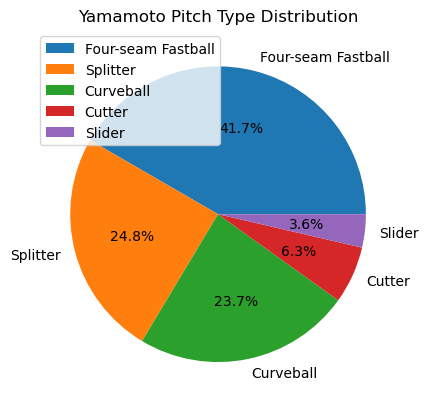

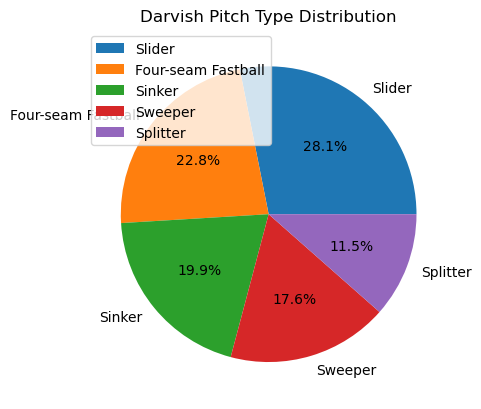

In [8]:
# Get pitch type and visualize for (use pie chart)

import matplotlib.pyplot as plt

# map pitch types
pitch_types = {
    "FF": "Four-seam Fastball",
    "FT": "Two-seam Fastball",
    "FC": "Cutter",
    "FS": "Splitter",
    "SL": "Slider",
    "CH": "Changeup",
    "CU": "Curveball",
    "KC": "Knuckle Curve",
    "EP": "Eephus",
    "FO": "Pitchout",
    "SC": "Screwball",
    "SI": "Sinker",
    "KN": "Knuckleball",
    "UN": "Unidentified",
    "ST": "Sweeper",
}


def pitch_type(data, pitcher_name):
    pitch_type = data["pitch_type"].value_counts()
    pitch_type = pitch_type.reset_index()
    pitch_type.columns = ["pitch_type", "count"]
    pitch_type["pitch_type"] = pitch_type["pitch_type"].map(pitch_types)
    pitch_type = pitch_type.sort_values("count", ascending=False)
    pitch_type = pitch_type.head(5)
    plt.pie(pitch_type["count"], labels=pitch_type["pitch_type"], autopct="%1.1f%%")
    plt.title(f"{pitcher_name} Pitch Type Distribution")
    plt.legend(loc="upper left")
    plt.show()


pitch_type(yamamoto, "Yamamoto")
pitch_type(darvish, "Darvish")
# pitch_type(jack, "Flaherty")

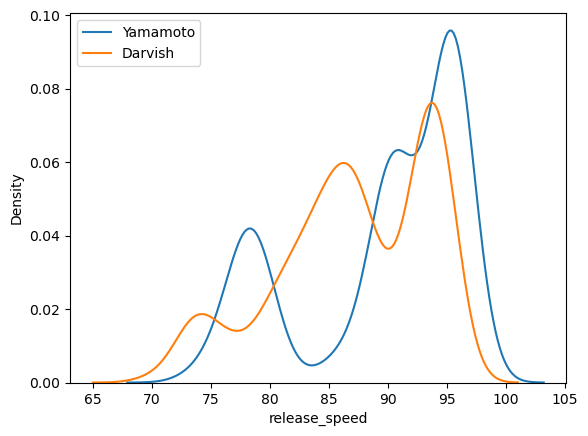

In [9]:
# Do one for Release Speed, do KDE, compare all three in the same plot

import seaborn as sns


def release_speed(data, pitcher_name):
    sns.kdeplot(data["release_speed"], label=pitcher_name)


release_speed(yamamoto, "Yamamoto")
release_speed(darvish, "Darvish")
# release_speed(jack, "Flaherty")
plt.legend()

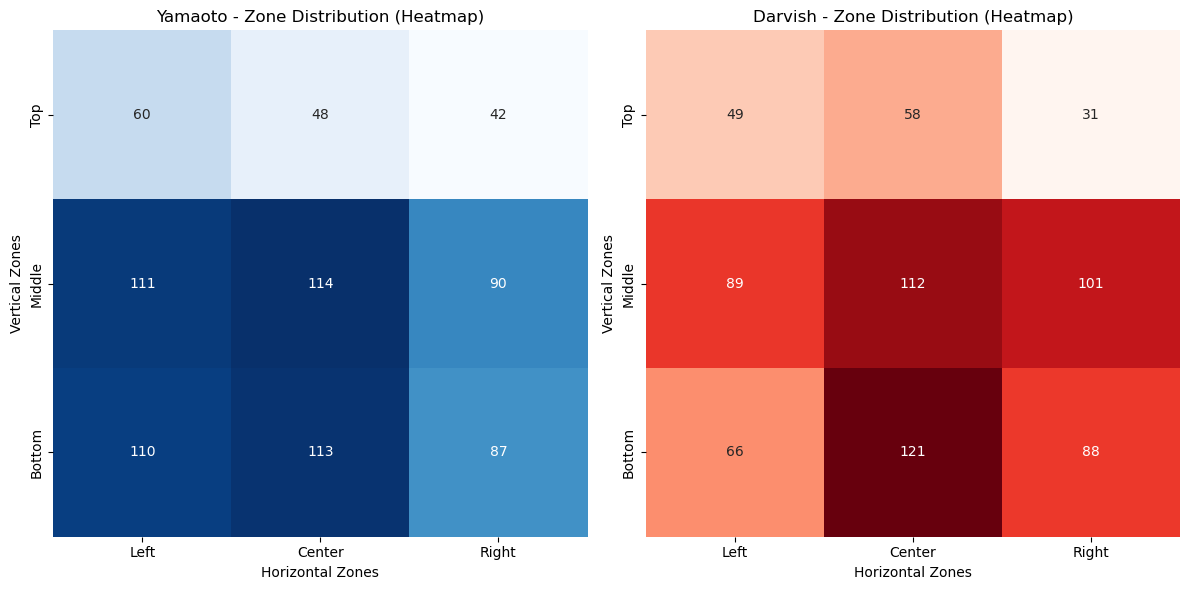

In [10]:
# Let's create a 9-zone heatmap based on the zone distribution for both Pitcher 1 and Pitcher 2

yamamoto_zones = (
    yamamoto["zone"].value_counts().reindex(range(1, 10), fill_value=0).sort_index()
)
darvish_zones = (
    darvish["zone"].value_counts().reindex(range(1, 9 + 1), fill_value=0).sort_index()
)

pitcher1_zone_matrix = yamamoto_zones.values.reshape(3, 3)
pitcher2_zone_matrix = darvish_zones.values.reshape(3, 3)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(
    pitcher1_zone_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    cbar=False,
    xticklabels=["Left", "Center", "Right"],
    yticklabels=["Top", "Middle", "Bottom"],
    ax=axes[0],
)
axes[0].set_title("Yamaoto - Zone Distribution (Heatmap)")
axes[0].set_xlabel("Horizontal Zones")
axes[0].set_ylabel("Vertical Zones")

sns.heatmap(
    pitcher2_zone_matrix,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    cbar=False,
    xticklabels=["Left", "Center", "Right"],
    yticklabels=["Top", "Middle", "Bottom"],
    ax=axes[1],
)
axes[1].set_title("Darvish - Zone Distribution (Heatmap)")
axes[1].set_xlabel("Horizontal Zones")
axes[1].set_ylabel("Vertical Zones")

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

scoring_events = ["home_run", "single", "double", "triple", "sac_fly"]

# For Yamamoto
scoring_df_yamamoto = yamamoto[yamamoto["events"].isin(scoring_events)]
pitch_event_count_yamamoto = (
    scoring_df_yamamoto.groupby(["pitch_type", "events"]).size().unstack(fill_value=0)
)

# For Darvish
scoring_df_darvish = darvish[darvish["events"].isin(scoring_events)]
pitch_event_count_darvish = (
    scoring_df_darvish.groupby(["pitch_type", "events"]).size().unstack(fill_value=0)
)

In [12]:
print(pitch_event_count_yamamoto.to_string())
print(pitch_event_count_darvish.to_string())

events      double  home_run  sac_fly  single  triple
pitch_type                                           
CU               6         2        0       8       0
FC               2         1        1       5       0
FF               8         3        2      22       1
FS               4         2        1      11       1
SI               2         0        0       2       0
SL               1         0        0       2       0
events      double  home_run  sac_fly  single  triple
pitch_type                                           
CU               0         1        0       5       0
FF               4         2        1       6       1
FS               2         1        0       3       0
KC               0         0        0       1       0
SI               3         3        1       9       0
SL               2         4        3      12       0
ST               2         1        0       6       0


Text(0.5, 1.0, 'Difference in Scoring Events between Yamamoto and Darvish')

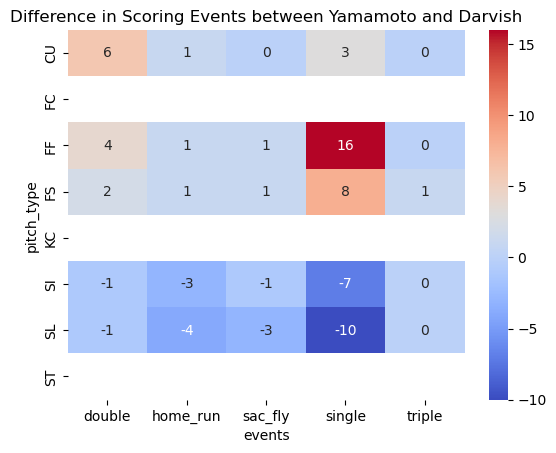

In [13]:
# find the difference between the two pitchers so that we can see which pitch type is more effective for each pitcher, make it like a heatmap

pitch_event_diff = pitch_event_count_yamamoto - pitch_event_count_darvish

sns.heatmap(pitch_event_diff, annot=True, cmap="coolwarm")
plt.title("Difference in Scoring Events between Yamamoto and Darvish")
# plus means Yamamoto is better, minus means Darvish is better

# Yamamoto and Darvish common opponents ERA comparison

In [18]:
common_opponents = (
    set(yamamoto["home_team"])
    .intersection(set(darvish["home_team"]))
    .union(set(yamamoto["away_team"]).intersection(set(darvish["away_team"])))
)

yamamoto_common = yamamoto[
    (yamamoto["home_team"].isin(common_opponents))
    | (yamamoto["away_team"].isin(common_opponents))
]
darvish_common = darvish[
    (darvish["home_team"].isin(common_opponents))
    | (darvish["away_team"].isin(common_opponents))
]

era_yamamoto = (
    yamamoto_common["events"].str.contains("home_run").sum() / yamamoto_common.shape[0]
) * 9
era_darvish = (
    darvish_common["events"].str.contains("home_run").sum() / darvish_common.shape[0]
) * 9

print(f"Yamamoto ERA against common opponents: {era_yamamoto}")
print(f"Darvish ERA against common opponents: {era_darvish}")

Yamamoto ERA against common opponents: 0.04708960104643558
Darvish ERA against common opponents: 0.08041697691734921


# Yamamoto and Darvish Average Run Support

In [22]:
# Run Support means the average number of runs scored by the team of the pitcher in the games he has pitched
yamamoto_games = (
    yamamoto.groupby("game_date")
    .agg({"home_score": "first", "away_score": "first"})
    .reset_index()
)
darvish_games = (
    darvish.groupby("game_date")
    .agg({"home_score": "first", "away_score": "first"})
    .reset_index()
)

yamamoto_runs = (yamamoto_games["home_score"] + yamamoto_games["away_score"]).mean()
darvish_runs = (darvish_games["home_score"] + darvish_games["away_score"]).mean()


print(f"Yamamoto Average Run Support: {yamamoto_runs}")
print(f"Darvish Average Run Support: {darvish_runs}")

Yamamoto Average Run Support: 4.631578947368421
Darvish Average Run Support: 3.823529411764706


# Launch Speed and Launch Angle Analysis

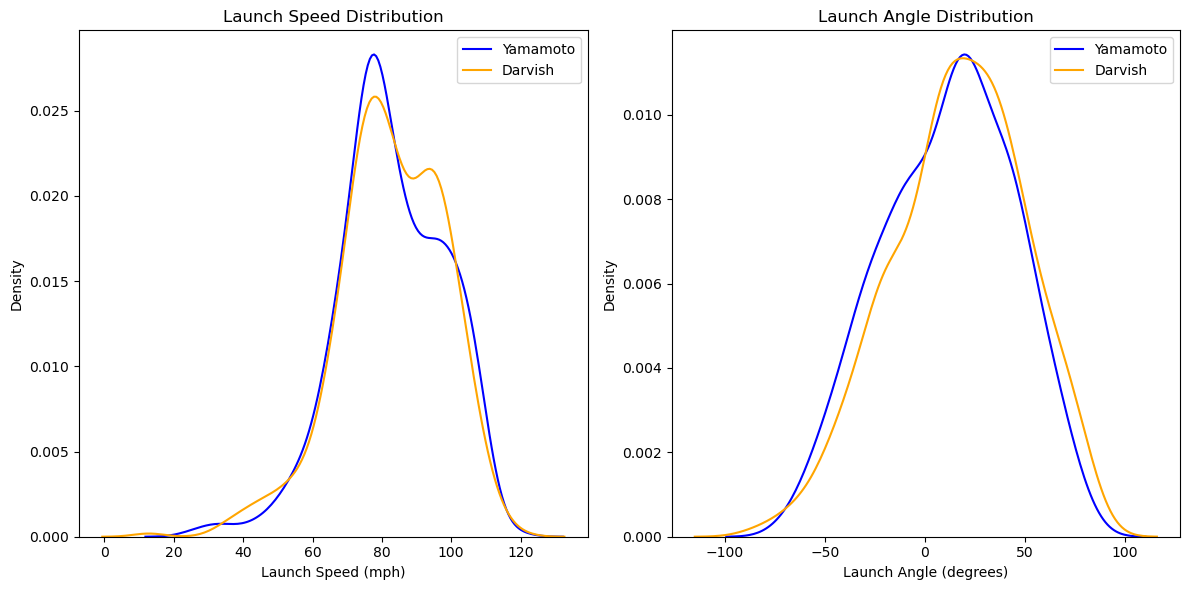

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(yamamoto["launch_speed"], label="Yamamoto", color="blue")
sns.kdeplot(darvish["launch_speed"], label="Darvish", color="orange")
plt.title("Launch Speed Distribution")
plt.xlabel("Launch Speed (mph)")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(yamamoto["launch_angle"], label="Yamamoto", color="blue")
sns.kdeplot(darvish["launch_angle"], label="Darvish", color="orange")
plt.title("Launch Angle Distribution")
plt.xlabel("Launch Angle (degrees)")
plt.legend()

plt.tight_layout()
plt.show()

# K/9 and BB/9 

In [25]:
k_yamamoto = yamamoto["events"].str.contains("strikeout").sum() / (
    yamamoto.shape[0] / 9
)
bb_yamamoto = yamamoto["events"].str.contains("walk").sum() / (yamamoto.shape[0] / 9)

k_darvish = darvish["events"].str.contains("strikeout").sum() / (darvish.shape[0] / 9)
bb_darvish = darvish["events"].str.contains("walk").sum() / (darvish.shape[0] / 9)

# K/9 means strikeouts per 9 innings, BB/9 means walks per 9 innings
# The higher the K/9, the better the pitcher is at striking out batters
# The lower the BB/9, the better the pitcher is at not walking batters

print(f"Yamamoto - K/9: {k_yamamoto}, BB/9: {bb_yamamoto}")
print(f"Darvish - K/9: {k_darvish}, BB/9: {bb_darvish}")

Yamamoto - K/9: 0.6239372138652715, BB/9: 0.14126880313930673
Darvish - K/9: 0.5428145941921072, BB/9: 0.154132539091586


# Calculate FIP for both pitchers

In [27]:
def calculate_fip(home_runs, walks, strikeouts, innings_pitched):
    return ((13 * home_runs) + (3 * walks) - (2 * strikeouts)) / innings_pitched + 3.2


innings_pitched_yamamoto = yamamoto.shape[0] / 100
innings_pitched_darvish = darvish.shape[0] / 100

fip_yamamoto = calculate_fip(
    yamamoto["events"].str.contains("home_run").sum(),
    yamamoto["events"].str.contains("walk").sum(),
    yamamoto["events"].str.contains("strikeout").sum(),
    innings_pitched_yamamoto,
)

fip_darvish = calculate_fip(
    darvish["events"].str.contains("home_run").sum(),
    darvish["events"].str.contains("walk").sum(),
    darvish["events"].str.contains("strikeout").sum(),
    innings_pitched_darvish,
)

# FIP means Fielding Independent Pitching, which is a metric that estimates a pitcher's run prevention independent of the performance of their defense. It is scaled to be similar to ERA, so a good FIP is around 3.50. The lower the FIP, the better the pitcher is at preventing runs.
print(f"Yamamoto - FIP: {fip_yamamoto}")
print(f"Darvish - FIP: {fip_darvish}")

Yamamoto - FIP: 0.8455199476782211
Darvish - FIP: 7.890990320178704


In [ ]:
# TODO: I'm pretty sure that FIP math is wrong otherwise Yamamoto is literally Ed Walsh.